<a href="https://colab.research.google.com/github/57baek/gpt-from-scratch/blob/main/autograd/codes/autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
    return 3*x**2 - 4*x + 5

In [ ]:
f(3.0)

20.0

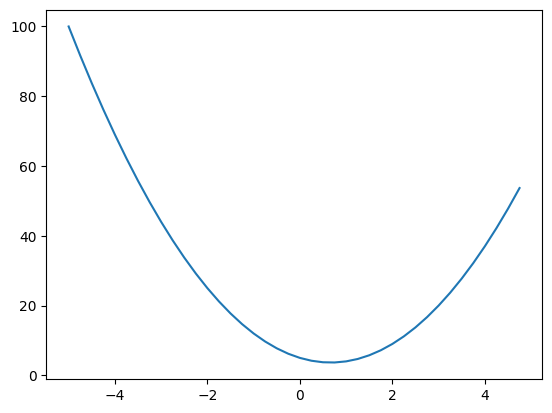

In [ ]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs, ys)

In [ ]:
h = 0.000001
x = 2/3

print(f(x))
print(f(x+h))

(f(x+h) - f(x))/h # a simple derivative

3.666666666666667
3.6666666666696663


2.999378523327323e-06

In [ ]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [ ]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self): # This controls how the object prints.
        return f"Value(data={self.data})"

a = Value(2.0)
a # will show <__main__.Value at 0x7e9ddb1142f0> without __repr__
b = Value(-3.0)
a,b

(Value(data=2.0), Value(data=-3.0))

In [ ]:
a + b

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

In [ ]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other): # “If someone writes a + b, I will look for a.__add__(b).”
        out = Value(self.data + other.data) # Still need to define what would happen after matching
        return out
a = Value(2.0)
b = Value(-3.0)
a + b # Python internally translates it to a.__add__(b)

Value(data=-1.0)

In [ ]:
type(a+b)

__main__.Value

In [ ]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

    def __mul__(self, other):
        out = self.data * other.data
        return out

a = Value(2.0)
b = Value(-3.0)
a * b # Python internally translates it to a.__mul__(b)

-6.0

In [ ]:
class Value:
    def __init__(self, data, _children=()): # default value of an empty tuple
        self.data = data
        self._prev = set(_children) # the set of parent nodes that produced this node

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other))
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other))
        return out

a = Value(2.0)
b = Value(-3.0)
c = a * b
d = a * b + c

d._prev

{Value(data=-6.0), Value(data=-6.0)}

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op = ''): # default empty string
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out


a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a * b + c

d._op

'+'

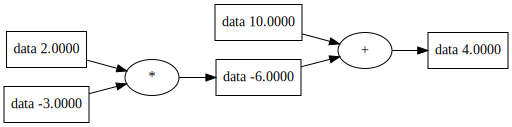

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ data %.4f }" % (n.data, ), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


draw_dot(d)

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op = '', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'

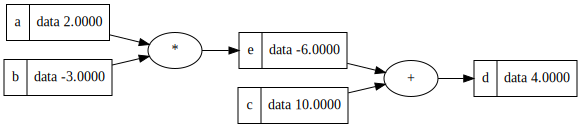

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


draw_dot(d)

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op = '', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'

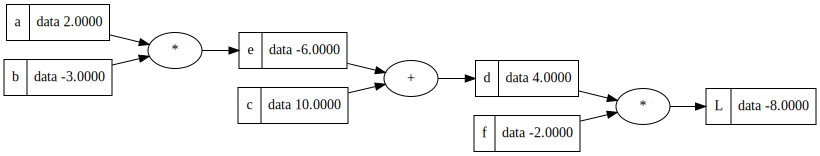

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


draw_dot(L)

In [ ]:
# Partial derivative = "If I just change one input, how much does L change?" = Rate of change of the system wrt one variable while freezing all others = How sensitive L is to that input

def lol():

    h = 0.0001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data


    h = 0.0001
    a = Value(2.0, label='a') # “How does the output L change if I change a?”
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L2 = L.data + h


    print((L2 - L1)/h)

lol() # Gradients (∂L/∂a, ∂L/∂b, etc.) are only meaningful inside the “world” of the function/system you’re studying -> They are local unitless scales


0.9999999999976694


In [ ]:
def lol():

    h = 0.0001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data


    h = 0.0001
    a = Value(2.0 - h, label='a') # “How does the output L change if I change a?”
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L2 = L.data


    print((L2 - L1)/h)

lol()


-6.00000000000378


In [ ]:
class Value:
    def __init__(self, data, _children=(), _op = '', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [ ]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
L.grad = 1.0

f.grad = 4.0
d.grad = -2.0
c.grad = -2.0
e.grad = -2.0
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

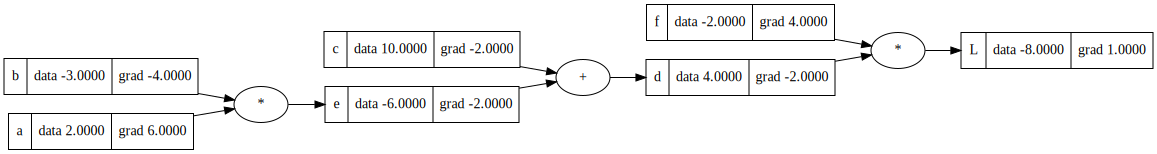

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


draw_dot(L)

# 📘 Derivative of Multiplication (with Chain Rule)

We want the derivative of  

$$
L = d \cdot f
$$  

with respect to $d$.  

---

### 🔹 Step 1: Chain rule starting point  

By definition of backpropagation, we always start from:  

$$
\frac{\partial L}{\partial L} = 1
$$  

Then the chain rule says:  

$$
\frac{\partial L}{\partial d}
= \frac{\partial L}{\partial L} \cdot \frac{\partial L}{\partial d}
$$  

---

### 🔹 Step 2: Definition of derivative  

$$
\frac{\partial L}{\partial d}
= \lim_{h \to 0} \frac{L(d+h) - L(d)}{h}
$$  

---

### 🔹 Step 3: Plug in $L = d \cdot f$  

$$
= \lim_{h \to 0} \frac{(d+h)\cdot f - (d \cdot f)}{h}
$$  

---

### 🔹 Step 4: Expand  

$$
= \lim_{h \to 0} \frac{d \cdot f + h \cdot f - d \cdot f}{h}
$$  

The $d \cdot f$ terms cancel out.  

---

### 🔹 Step 5: Simplify  

$$
= \lim_{h \to 0} \frac{h \cdot f}{h}
$$  

---

### 🔹 Step 6: Cancel $h$  

$$
= f
$$  

---

✅ **Therefore (with chain rule):**  

$$
\frac{\partial L}{\partial d}
= \frac{\partial L}{\partial L} \cdot f
= 1 \cdot f
= f
$$

In [ ]:
def lol():

    h = 0.0001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data


    h = 0.0001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.labl='e'
    d = e + c; d.label='d'
    f = Value(-2.0 + h, label='f') # If I change f, I will see dL/dd = 4 amounts of change
    L = d * f; L.label='L'
    L2 = L.data


    print((L2 - L1)/h)

lol()


3.9999999999995595


# 📘 Derivate of Addition

We want the derivative of  

$$
d = c + e
$$  

with respect to $c$.  

---

🔹 **Step 1: Definition of derivative**  

$$
\frac{\partial d}{\partial c} = \lim_{h \to 0} \frac{d(c+h) - d(c)}{h}
$$  

---

🔹 **Step 2: Plug in $d = c + e$**  

$$
= \lim_{h \to 0} \frac{((c+h)+e) - (c+e)}{h}
$$  

---

🔹 **Step 3: Expand**  

$$
= \lim_{h \to 0} \frac{c + h + e - c - e}{h}
$$  

---

🔹 **Step 4: Simplify**  

$$
= \lim_{h \to 0} \frac{h}{h}
$$  

---

🔹 **Step 5: Cancel $h$**  

$$
= 1
$$  

---

✅ Therefore:  

$$
\frac{\partial d}{\partial c} = 1
$$

In [ ]:
def lol():

    h = 0.0001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    D1 = d.data


    h = 0.0001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0 + h, label='c')
    e = a * b; e.labl='e'
    d = e + c; d.label='d'
    D2 = d.data


    print((D2 - D1)/h)

lol()


0.9999999999976694


# 🔗 Chain Rule Example

Suppose we want:

$$
\frac{\partial L}{\partial c}
$$

but $L$ depends on $c$ **through** an intermediate variable $d$.  

---

### ✅ Chain Rule Formula

$$
\frac{\partial L}{\partial c}
= \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial c}
$$

---

### 🧩 Explanation

- We know $\frac{\partial L}{\partial d}$: how $L$ changes with $d$.  
- We know $\frac{\partial d}{\partial c}$: how $d$ changes with $c$.  
- Multiplying them gives $\frac{\partial L}{\partial c}$: how $L$ changes with $c$ through $d$.  

---

### 🔍 Intuition

The chain rule says:  
*“If $c$ nudges $d$, and $d$ nudges $L$, then the total effect of $c$ on $L$ is the product of those nudges.”*  

It’s like passing the influence along the chain:

$$
c \;\;\rightarrow\;\; d \;\;\rightarrow\;\; L
$$

# 🔗 Why the Chain Rule Works (Mathematical Proof)

Suppose we have a function of a function:

$$
L = f(d), \quad d = g(c)
$$

So overall:

$$
L = f(g(c))
$$

We want:

$$
\frac{dL}{dc}
$$

---

### 🔹 Step 1: Definition of derivative

$$
\frac{dL}{dc} = \lim_{h \to 0} \frac{L(c+h) - L(c)}{h}
$$

Substitute $L(c) = f(g(c))$:

$$
= \lim_{h \to 0} \frac{f(g(c+h)) - f(g(c))}{h}
$$

---

### 🔹 Step 2: Introduce $\Delta d$

Let:

$$
\Delta d = g(c+h) - g(c)
$$

So:

$$
\frac{dL}{dc} = \lim_{h \to 0} \frac{f(g(c) + \Delta d) - f(g(c))}{h}
$$

---

### 🔹 Step 3: Multiply and divide by $\Delta d$

$$
\frac{dL}{dc} = \lim_{h \to 0}
\left(
\frac{f(g(c)+\Delta d) - f(g(c))}{\Delta d}
\cdot
\frac{\Delta d}{h}
\right)
$$

---

### 🔹 Step 4: Interpret the two limits

1. The first fraction is the derivative of $f$ with respect to $d$:

$$
\lim_{\Delta d \to 0} \frac{f(g(c)+\Delta d) - f(g(c))}{\Delta d}
= f'(g(c))
$$

2. The second fraction is the derivative of $g$ with respect to $c$:

$$
\lim_{h \to 0} \frac{g(c+h) - g(c)}{h}
= g'(c)
$$

---

### 🔹 Step 5: Multiply results

$$
\frac{dL}{dc} = f'(g(c)) \cdot g'(c)
$$

---

✅ **Therefore, the chain rule:**

$$
\frac{dL}{dc} = \frac{dL}{dd} \cdot \frac{dd}{dc}
$$

This shows that the rate of change "flows through" intermediate variables.

# 📘 Gradient of $L$ with respect to $a$

We know:

$$
L = d \cdot f, \quad d = e + c, \quad e = a \cdot b
$$

---

### 🔹 Step 1: Gradient flowing into $e$

Suppose from previous steps we already computed:

$$
\frac{\partial L}{\partial e} = -2.0
$$

---

### 🔹 Step 2: Local derivative of $e$ with respect to $a$

Since:

$$
e = a \cdot b
$$  

the derivative is:

$$
\frac{\partial e}{\partial a} = b
$$

---

### 🔹 Step 3: Apply the chain rule

Now combine them:

$$
\frac{\partial L}{\partial a}
= \frac{\partial L}{\partial e} \cdot \frac{\partial e}{\partial a}
$$

---

### 🔹 Step 4: Plug in numbers

$$
\frac{\partial L}{\partial a} = (-2.0) \cdot (-3.0)
$$  

---

✅ Therefore:

$$
a.\text{grad} = 6.0
$$

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op = '', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
L.grad = 1.0

f.grad = 4.0
d.grad = -2.0
c.grad = -2.0
e.grad = -2.0
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

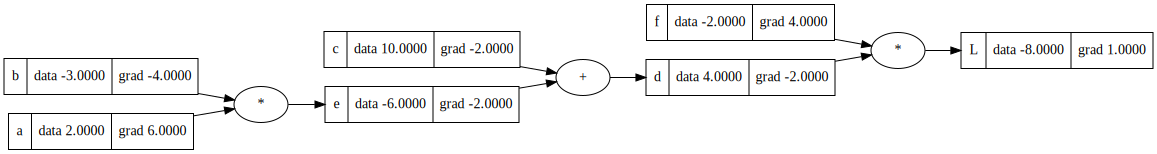

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

draw_dot(L)

-7.286496


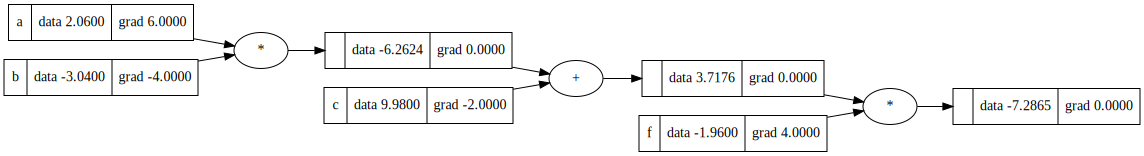

In [ ]:
# We want L to go up!
LR = 0.01

a.data += LR * a.grad
b.data += LR * b.grad
c.data += LR * c.grad
f.data += LR * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)
draw_dot(L)

In [ ]:
# Reset

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
L.grad = 1.0

f.grad = 4.0
d.grad = -2.0
c.grad = -2.0
e.grad = -2.0
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

draw_dot(L)

-8.726303999999999


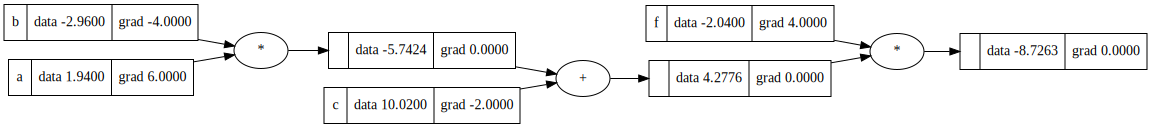

In [ ]:
# We want L to go down!
LR = 0.01

a.data -= LR * a.grad
b.data -= LR * b.grad
c.data -= LR * c.grad
f.data -= LR * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)
draw_dot(L)

# 📌 Deriving Gradients for L = (a·b + c)·f

We want to compute the gradients of:

$$
L = (a \cdot b + c) \cdot f
$$

with respect to each variable: \(a, b, c, f\).

---

## 🔹 Step 1: Define intermediate variables

Let:
$$
d = a \cdot b + c
$$

So:
$$
L = d \cdot f
$$

---

## 🔹 Step 2: Gradient of L w.r.t. d

From the product rule:

$$
\frac{\partial L}{\partial d} = f
$$

---

## 🔹 Step 3: Gradient of L w.r.t. f

Similarly:

$$
\frac{\partial L}{\partial f} = d
$$

---

## 🔹 Step 4: Gradients of d

Since:
$$
d = a \cdot b + c
$$

- With respect to \(a\):
$$
\frac{\partial d}{\partial a} = b
$$

- With respect to \(b\):
$$
\frac{\partial d}{\partial b} = a
$$

- With respect to \(c\):
$$
\frac{\partial d}{\partial c} = 1
$$

---

## 🔹 Step 5: Apply the Chain Rule

Now we connect everything using:

$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial x}
$$

for \(x \in \{a, b, c\}\).

- For \(a\):
$$
\frac{\partial L}{\partial a} = \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial a} = f \cdot b
$$

- For \(b\):
$$
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial b} = f \cdot a
$$

- For \(c\):
$$
\frac{\partial L}{\partial c} = \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial c} = f \cdot 1 = f
$$

---

## ✅ Final Results

So the gradients are:

$$
\frac{\partial L}{\partial a} = b \cdot f, \quad
\frac{\partial L}{\partial b} = a \cdot f, \quad
\frac{\partial L}{\partial c} = f, \quad
\frac{\partial L}{\partial f} = (a \cdot b + c)
$$

# 📌 Gradient Descent vs Gradient Ascent

We want to optimize the function:

$$
L = (a \cdot b + c) \cdot f
$$

with parameters $a, b, c, f$.

---

## 🔹 Step 1: Gradients (what they are and where they come from)

Compute intermediate:
$$
d = a \cdot b + c, \qquad L = d \cdot f
$$

By basic differentiation (product/chain rule):

$$
\frac{\partial L}{\partial d} = f, \qquad
\frac{\partial L}{\partial f} = d
$$

and for $d = a \cdot b + c$:

$$
\frac{\partial d}{\partial a} = b, \quad
\frac{\partial d}{\partial b} = a, \quad
\frac{\partial d}{\partial c} = 1
$$

Now use the chain rule for $x \in \{a,b,c\}$:

$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial x}
$$

So final gradients:

$$
\boxed{\;\;
\frac{\partial L}{\partial a} = b \cdot f,\quad
\frac{\partial L}{\partial b} = a \cdot f,\quad
\frac{\partial L}{\partial c} = f,\quad
\frac{\partial L}{\partial f} = a \cdot b + c
\;\;}
$$

Each gradient is the **local slope** of $L$ in that parameter direction.

## 🔹 Step 2: What the gradient *sign* means (core intuition)

- If $\frac{\partial L}{\partial x} > 0$: increasing $x$ (a small positive change) makes $L$ go **up**.  
  → decreasing $x$ will make $L$ go **down**.

- If $\frac{\partial L}{\partial x} < 0$: increasing $x$ makes $L$ go **down**.  
  → decreasing $x$ will make $L$ go **up**.

So the **sign** tells you *which way is uphill* for $L$, and the **magnitude** tells you *how steep*.

## 🔹 Step 3: Gradient Descent — make $L$ go **down**

We pick a learning rate $\eta > 0$. The universal rule to *decrease* $L$ is:

    a.data -= η * a.grad
    b.data -= η * b.grad
    c.data -= η * c.grad
    f.data -= η * f.grad

**Why this works (step-by-step reasoning):**

Let $g = \frac{\partial L}{\partial a}$.

- If $g > 0$: increasing $a$ increases $L$. To make $L$ smaller, we must **decrease $a$**. Subtracting $\eta g$ decreases $a$.  
- If $g < 0$: increasing $a$ decreases $L$. To make $L$ smaller, we should **increase $a$**. Subtracting $\eta g$ (where $g$ is negative) **increases** $a$.  
- Therefore `a -= η * a.grad` always moves $a$ in the direction that reduces $L$. Same logic applies for `b, c, f`.  

(So subtracting is *not* arbitrary — it always moves the parameter opposite the local slope, i.e. downhill.)

---

## 🔹 Step 4: Gradient Ascent — make $L$ go **up**

To *increase* $L$, move **with** the gradient:

    a.data += η * a.grad
    b.data += η * b.grad
    c.data += η * c.grad
    f.data += η * f.grad

**Why this works:**

- If $g > 0$: adding increases $a$ and increases $L$.  
- If $g < 0$: adding decreases $a$ (because $g$ is negative) and that can increase $L$.  

So `a += η * a.grad` always moves you **uphill**.

---

## 🔹 Step 5: 1D concrete intuition example

Let $L(x) = x^2$. Then $\frac{dL}{dx} = 2x$.

- At $x = 3$: gradient = 6 > 0  
  - **Descent**: $x \leftarrow x - \eta \cdot 6$ → moves left toward 0 → lowers $L$.  
  - **Ascent**: $x \leftarrow x + \eta \cdot 6$ → moves right away from 0 → raises $L$.  

- At $x = -3$: gradient = -6 < 0  
  - **Descent**: $x \leftarrow x - \eta \cdot (-6) = x + \eta \cdot 6$ → moves right toward 0 → lowers $L$.  
  - **Ascent**: $x \leftarrow x + \eta \cdot (-6) = x - \eta \cdot 6$ → moves left away from 0 → raises $L$.  

Thus `-=` always moves toward **lower loss**; `+=` always moves toward **higher loss**.

---

## 🔹 Step 6: Practical tips

- ML training usually **minimizes** a loss → use **gradient descent** (`-=`).  
- Choose $begin:math:text$\\eta$end:math:text$ carefully: too large → divergence; too small → slow learning.  
- Optimizers (SGD, Adam, RMSprop) add momentum/adaptive steps but the sign logic stays the same.

---

## 🔹 Step 7: Quick numeric demo (paste into a code cell to try)

You can paste the following code into a Colab **code** cell (not text cell) to see numeric behavior:

```python
def compute_L(a,b,c,f):
    return (a*b + c) * f

# initial example
a, b, c, f = 2.0, -3.0, 10.0, -2.0
print("Initial:", a,b,c,f, "L=", compute_L(a,b,c,f))

# analytic grads for toy L
grad_a = b * f
grad_b = a * f
grad_c = f
grad_f = a*b + c
print("grads:", grad_a, grad_b, grad_c, grad_f)

eta = 0.01

# gradient descent step (minimize L)
a_desc = a - eta * grad_a
b_desc = b - eta * grad_b
c_desc = c - eta * grad_c
f_desc = f - eta * grad_f
print("After descent L =", compute_L(a_desc, b_desc, c_desc, f_desc))

# gradient ascent step (maximize L)
a_asc = a + eta * grad_a
b_asc = b + eta * grad_b
c_asc = c + eta * grad_c
f_asc = f + eta * grad_f
print("After ascent  L =", compute_L(a_asc, b_asc, c_asc, f_asc))
```

---

### ✅ Final short takeaway (one line)

- `param -= η * grad` → always moves parameters **downhill** (reduce $L$).  
- `param += η * grad` → always moves parameters **uphill** (increase $L$).  

# 📌 Why just add or subtract the gradients regardless of its sign?

We start with the first-order Taylor expansion:

$$
L(x + \Delta x) \;\approx\; L(x) + \frac{\partial L}{\partial x} \cdot \Delta x
$$

---

### Gradient Ascent

Choose the update step:

$$
\Delta x = + \eta \cdot \frac{\partial L}{\partial x}
$$

Substitute:

$$
L(x + \Delta x) \;\approx\; L(x) + \frac{\partial L}{\partial x} \cdot
\Big( \eta \cdot \frac{\partial L}{\partial x} \Big)
$$

$$
= L(x) + \eta \cdot \Big( \frac{\partial L}{\partial x} \Big)^2
$$

Since

$$
\Big( \frac{\partial L}{\partial x} \Big)^2 \geq 0, \quad \eta > 0,
$$

we know:

$$
L(x + \Delta x) \;\geq\; L(x).
$$

So **gradient ascent always increases \(L\)**.

---

### Gradient Descent

Choose the update step:

$$
\Delta x = - \eta \cdot \frac{\partial L}{\partial x}
$$

Substitute:

$$
L(x + \Delta x) \;\approx\; L(x) - \eta \cdot
\Big( \frac{\partial L}{\partial x} \Big)^2
$$

Since

$$
\Big( \frac{\partial L}{\partial x} \Big)^2 \geq 0, \quad \eta > 0,
$$

we know:

$$
L(x + \Delta x) \;\leq\; L(x).
$$

So **gradient descent always decreases \(L\)**.

---

### Intuition

- The **gradient’s sign** tells you whether \(L\) increases to the left or right.  
- In ascent, we **add the gradient** → guaranteed uphill.  
- In descent, we **subtract the gradient** → guaranteed downhill.  
- The exact sign of the gradient doesn’t matter in the update rule, because it is already encoded in the step direction.

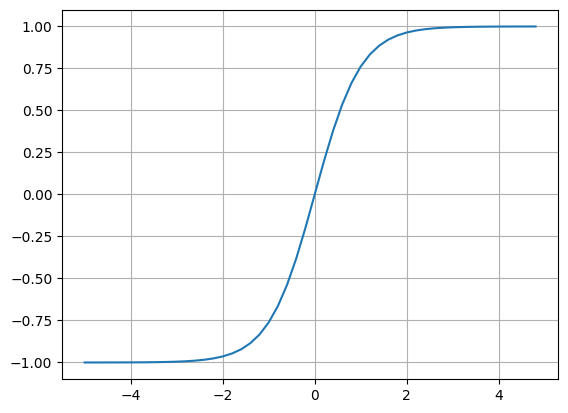

In [ ]:
# Apply activation functions and bias

import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)))
plt.grid()

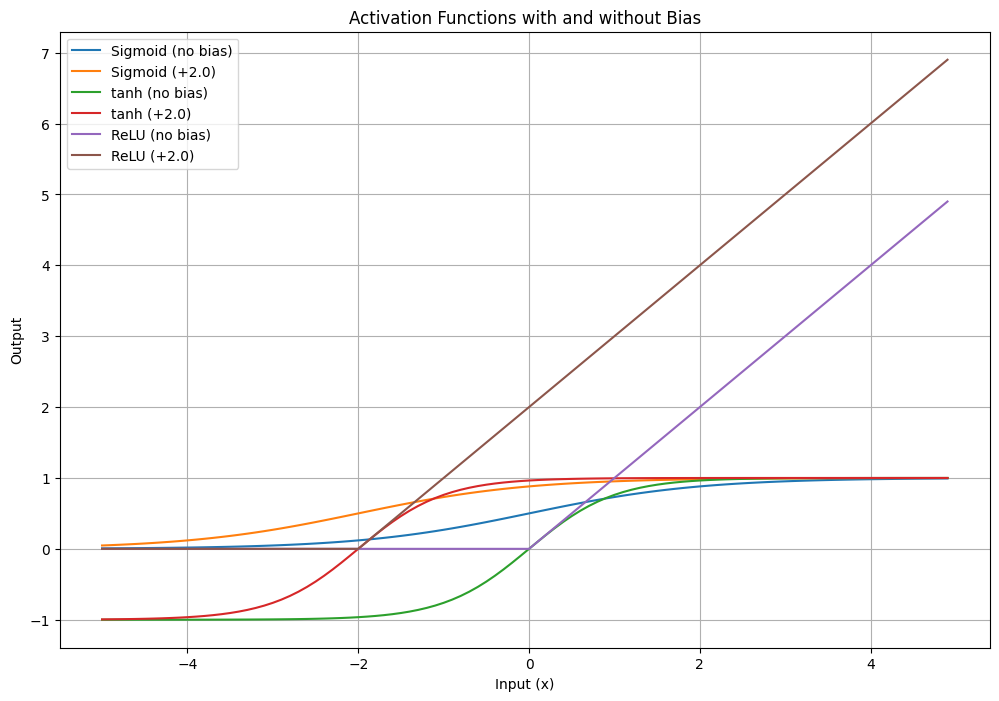

In [ ]:
# 📌 Apply activation functions and bias

import matplotlib.pyplot as plt
import numpy as np
import math

# Input values
x = np.arange(-5, 5, 0.1)

# Define activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def linear(z):
    return z

# Bias term
bias = 2.0

# Apply functions with and without bias
activations = {
    "Sigmoid (no bias)": sigmoid(x),
    f"Sigmoid (+{bias})": sigmoid(x + bias),
    "tanh (no bias)": np.tanh(x),
    f"tanh (+{bias})": np.tanh(x + bias),
    "ReLU (no bias)": relu(x),
    f"ReLU (+{bias})": relu(x + bias),
    #"Linear (no bias)": linear(x),
    #f"Linear (+{bias})": linear(x + bias),
}

# Plot
plt.figure(figsize=(12, 8))
for name, y in activations.items():
    plt.plot(x, y, label=name)

plt.title("Activation Functions with and without Bias")
plt.xlabel("Input (x)")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()

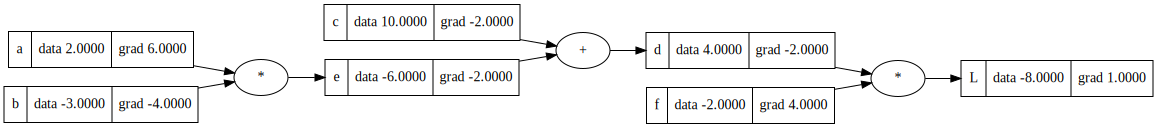

In [ ]:
# Reset

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
L.grad = 1.0

f.grad = 4.0
d.grad = -2.0
c.grad = -2.0
e.grad = -2.0
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

draw_dot(L)

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op = '', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out


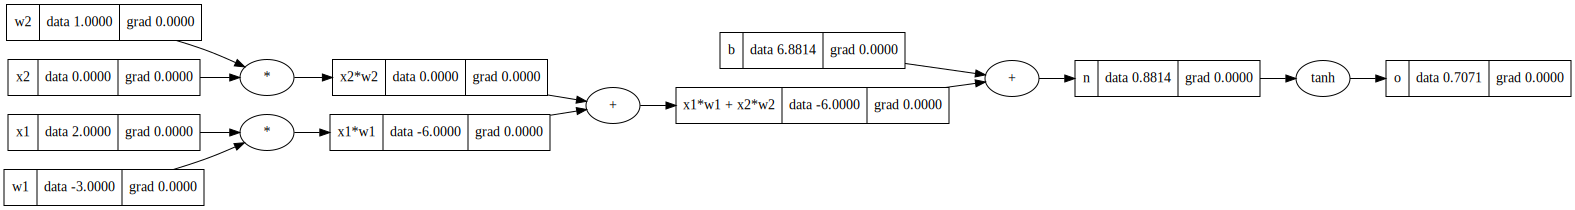

In [ ]:
# inputs x1,x2 -> Raw inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2 -> Synaptic strength that connects the inputs
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1
x1w1.label = 'x1*w1'

x2w2 = x2*w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'

o = n.tanh()
o.label = 'o'

draw_dot(o)

# 📌 Backpropagation: Why ∂o/∂n is the derivative of tanh

We are analyzing:

$$
o = \tanh(n)
$$

and we want the gradient:

$$
\frac{\partial L}{\partial n}
$$

---

## 🧮 Step 1. Start point

We want:

$$
\frac{\partial L}{\partial n}
$$

But our final output is:

$$
o = \tanh(n)
$$

If we treat $L = o$ (i.e. the “loss” is just the output), then:

$$
\frac{\partial L}{\partial o} = \frac{\partial o}{\partial o} = 1
$$

➡️ This is simply because the derivative of any variable with respect to itself is 1.  
It initializes the chain rule so that when we propagate backward, we have a starting value.  

---

## 🧮 Step 2. Chain rule

The chain rule says:

$$
\frac{\partial L}{\partial n} = \frac{\partial L}{\partial o} \cdot \frac{\partial o}{\partial n}
$$

Since we already set:

$$
\frac{\partial L}{\partial o} = 1,
$$

this simplifies to:

$$
\frac{\partial L}{\partial n} = 1 \cdot \frac{\partial o}{\partial n}
$$

---

## 🧮 Step 3. Derivative of tanh

Now, because:

$$
o = \tanh(n),
$$

$o$ depends only on one variable $n$.

So the partial derivative is the same as the oridinary derivate.

we are literally asking:

$$
\frac{\partial o}{\partial n} = \frac{\partial}{\partial n} \big( \tanh(n) \big).
$$

So by calculus:

$$
\frac{d}{dn}\tanh(n) = 1 - \tanh^2(n).
$$

That is why $\frac{\partial o}{\partial n}$ is just the derivative of $\tanh$.  
It’s not a trick — it’s simply applying the definition of $o$ as a function of $n$.

---

## 🧮 Step 4. Plugging in values

At $n = 0.881373587$ we computed earlier:

$$
\tanh(n) \approx 0.707
$$

So:

$$
\frac{\partial o}{\partial n} = 1 - (0.707)^2 \approx 0.5
$$

Thus:

$$
\frac{\partial L}{\partial n} = 1 \cdot 0.5 = 0.5
$$

---

✅ Summary:  
- We start with $\frac{\partial o}{\partial o} = 1$ to initialize the chain rule.  
- Then $\frac{\partial L}{\partial n}$ follows the chain rule.  
- Since $o = \tanh(n)$, $\frac{\partial o}{\partial n}$ is just the derivative of tanh.  
- Numerically, at this $n$, the gradient is about $0.5$.

# 📌 Backpropagation Through a Single Neuron (with all intermediate nodes)

We have the forward pass:

$$
o = \tanh(n), \quad \text{where } n = (x_1 w_1 + x_2 w_2) + b
$$

with:

- $x_1 = 2.0$
- $x_2 = 0.0$
- $w_1 = -3.0$
- $w_2 = 1.0$
- $b = 6.8813735870$

---

## 🔹 Step 1. Forward pass

1. Multiply inputs by weights:

$$
x_1 w_1 = 2.0 \cdot (-3.0) = -6.0
$$

$$
x_2 w_2 = 0.0 \cdot 1.0 = 0.0
$$

2. Add partial results:

$$
(x_1 w_1 + x_2 w_2) = -6.0 + 0.0 = -6.0
$$

3. Add bias:

$$
n = (x_1 w_1 + x_2 w_2) + b = -6.0 + 6.8813735870 = 0.8813735870
$$

4. Apply activation:

$$
o = \tanh(n) = \tanh(0.8813735870) \approx 0.707
$$

---

## 🔹 Step 2. Backward pass (chain rule)

We want gradients for all parameters by expanding the chain rule fully.

---

### Gradient wrt $n$

Start with identity:

$$
\frac{\partial L}{\partial o} = 1
$$

Apply chain rule:

$$
\frac{\partial L}{\partial n} = \frac{\partial L}{\partial o} \cdot \frac{\partial o}{\partial n}
$$

Since $o = \tanh(n)$:

$$
\frac{\partial o}{\partial n} = 1 - \tanh^2(n) = 1 - (0.707)^2 \approx 0.5
$$

So:

$$
\frac{\partial L}{\partial n} = 1 \cdot 0.5 = 0.5
$$

---

### Gradient wrt bias $b$

Full chain:

$$
\frac{\partial L}{\partial b}
= \frac{\partial L}{\partial o} \cdot \frac{\partial o}{\partial n} \cdot \frac{\partial n}{\partial b}
$$

From $n = (x_1 w_1 + x_2 w_2) + b$:

$$
\frac{\partial n}{\partial b} = 1
$$

So:

$$
\frac{\partial L}{\partial b} = 1 \cdot 0.5 \cdot 1 = 0.5
$$

---

### Gradient wrt $x_1$

Full chain:

$$
\frac{\partial L}{\partial x_1}
= \frac{\partial L}{\partial o} \cdot \frac{\partial o}{\partial n} \cdot \frac{\partial n}{\partial (x_1 w_1 + x_2 w_2)} \cdot \frac{\partial (x_1 w_1 + x_2 w_2)}{\partial (x_1 w_1)} \cdot \frac{\partial (x_1 w_1)}{\partial x_1}
$$

We have:

- $\frac{\partial n}{\partial (x_1 w_1 + x_2 w_2)} = 1$  
- $\frac{\partial (x_1 w_1 + x_2 w_2)}{\partial (x_1 w_1)} = 1$  
- $\frac{\partial (x_1 w_1)}{\partial x_1} = w_1 = -3.0$  

So:

$$
\frac{\partial L}{\partial x_1} = 1 \cdot 0.5 \cdot 1 \cdot 1 \cdot (-3.0) = -1.5
$$

---

### Gradient wrt $w_1$

Full chain:

$$
\frac{\partial L}{\partial w_1}
= \frac{\partial L}{\partial o} \cdot \frac{\partial o}{\partial n} \cdot \frac{\partial n}{\partial (x_1 w_1 + x_2 w_2)} \cdot \frac{\partial (x_1 w_1 + x_2 w_2)}{\partial (x_1 w_1)} \cdot \frac{\partial (x_1 w_1)}{\partial w_1}
$$

We have:

- $\frac{\partial (x_1 w_1)}{\partial w_1} = x_1 = 2.0$

So:

$$
\frac{\partial L}{\partial w_1} = 1 \cdot 0.5 \cdot 1 \cdot 1 \cdot 2.0 = 1.0
$$

---

### Gradient wrt $x_2$

Full chain:

$$
\frac{\partial L}{\partial x_2}
= \frac{\partial L}{\partial o} \cdot \frac{\partial o}{\partial n} \cdot \frac{\partial n}{\partial (x_1 w_1 + x_2 w_2)} \cdot \frac{\partial (x_1 w_1 + x_2 w_2)}{\partial (x_2 w_2)} \cdot \frac{\partial (x_2 w_2)}{\partial x_2}
$$

We have:

- $\frac{\partial (x_2 w_2)}{\partial x_2} = w_2 = 1.0$

So:

$$
\frac{\partial L}{\partial x_2} = 1 \cdot 0.5 \cdot 1 \cdot 1 \cdot 1.0 = 0.5
$$

---

### Gradient wrt $w_2$

Full chain:

$$
\frac{\partial L}{\partial w_2}
= \frac{\partial L}{\partial o} \cdot \frac{\partial o}{\partial n} \cdot \frac{\partial n}{\partial (x_1 w_1 + x_2 w_2)} \cdot \frac{\partial (x_1 w_1 + x_2 w_2)}{\partial (x_2 w_2)} \cdot \frac{\partial (x_2 w_2)}{\partial w_2}
$$

We have:

- $\frac{\partial (x_2 w_2)}{\partial w_2} = x_2 = 0.0$

So:

$$
\frac{\partial L}{\partial w_2} = 1 \cdot 0.5 \cdot 1 \cdot 1 \cdot 0.0 = 0.0
$$

---

## 🔹 Final Gradients

- $\frac{\partial L}{\partial o} = 1.0$  
- $\frac{\partial L}{\partial n} = 0.5$  
- $\frac{\partial L}{\partial b} = 0.5$  
- $\frac{\partial L}{\partial x_1} = -1.5$  
- $\frac{\partial L}{\partial w_1} = 1.0$  
- $\frac{\partial L}{\partial x_2} = 0.5$  
- $\frac{\partial L}{\partial w_2} = 0.0$  

---

✅ Every gradient is the product of **all local derivatives along its path**, including the intermediate node $(x_1 w_1 + x_2 w_2)$.  
Even if that derivative is “1,” it must appear to show the path is complete.  

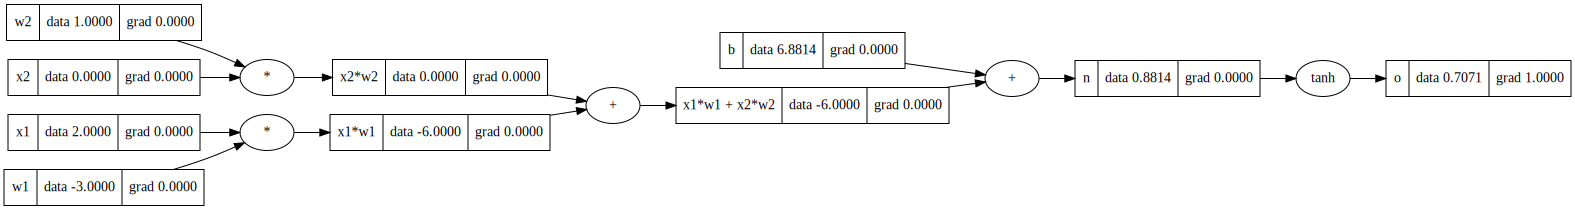

In [ ]:
o.grad = 1.0
draw_dot(o)

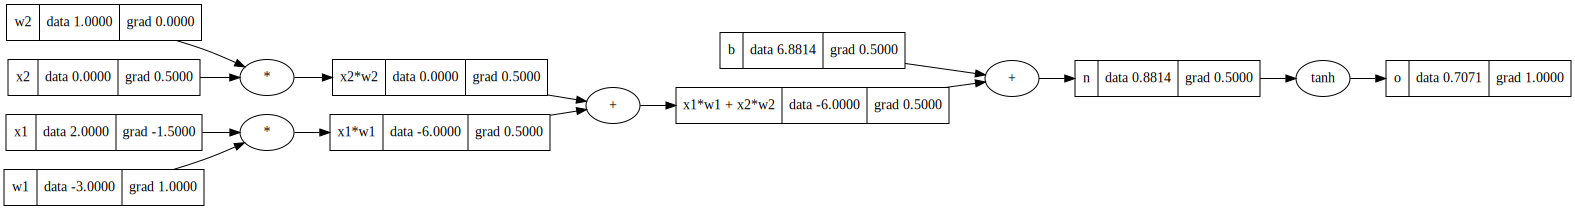

In [ ]:
# Backpropagation

# If o = tanh(n),  the what is do/dn?
# d(tanhx)/dx = 1 - tanh(x)**2 = 1 - o**2 = 0.5
n.grad = 1 - o.data**2

# Since + is just a distributor of gradient
b.grad = n.grad
x1w1x2w2.grad = n.grad
x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad

w1.grad = x1.data * x1w1.grad
w2.grad = x2.data * x2w2.grad

x1.grad = w1.data * x1w1.grad
x2.grad = w2.data * x2w2.grad

draw_dot(o)

# ⚙️ How `_backward()` for Addition Works

For addition:

$$
out = a + b
$$

By chain rule:

$$
\frac{\partial L}{\partial a} = \frac{\partial L}{\partial out} \cdot \frac{\partial out}{\partial a},
\quad
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial out} \cdot \frac{\partial out}{\partial b}
$$

Since:

$$
\frac{\partial out}{\partial a} = 1, \quad \frac{\partial out}{\partial b} = 1,
$$

we get:

$$
\frac{\partial L}{\partial a} = out.grad \cdot 1,
\quad
\frac{\partial L}{\partial b} = out.grad \cdot 1
$$

## 📌 Why `+=` is Needed in Addition

Example:

$$
L = (a+b) + (a+c)
$$

Here `a` appears twice.

---

### 🔹 Gradients
- From $(a+b)$: $\frac{\partial L}{\partial a} = 1$
- From $(a+c)$: $\frac{\partial L}{\partial a} = 1$

Total:

$$
\frac{\partial L}{\partial a} = 1 + 1 = 2
$$

---

### 🔹 If we use `=`
- First branch sets `a.grad = 1`
- Second branch overwrites it → `a.grad = 1` ❌

---

### 🔹 If we use `+=`
- First branch adds `+1`
- Second branch adds `+1` → `a.grad = 2` ✅

---

✅ So even in addition, we must use `+=` to accumulate gradients when a variable is reused.

---

## 🔹 Code meaning

- `out.grad` = all upstream gradient so far.  
- `1.0` = local derivative of $(a+b)$ wrt each input.  

```python
def _backward():
    self.grad += 1.0 * out.grad   # dL/da
    other.grad += 1.0 * out.grad # dL/db

# ⚙️ Backpropagation for Multiplication and Why We Use `+=`

---

## 🔹 Step 1. Multiplication rule

Suppose:

$$
out = a \cdot b
$$

We want the gradients:

$$
\frac{\partial L}{\partial a}, \quad \frac{\partial L}{\partial b}
$$

By the chain rule:

$$
\frac{\partial L}{\partial a} = \frac{\partial L}{\partial out} \cdot \frac{\partial out}{\partial a},
\quad
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial out} \cdot \frac{\partial out}{\partial b}
$$

And since:

$$
\frac{\partial out}{\partial a} = b, \quad \frac{\partial out}{\partial b} = a,
$$

we get:

$$
\frac{\partial L}{\partial a} = out.grad \cdot b.data,
\quad
\frac{\partial L}{\partial b} = out.grad \cdot a.data
$$

---

## 🔹 Step 2. Code implementation

```python
def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
        self.grad += out.grad * other.data   # dL/da
        other.grad += out.grad * self.data   # dL/db

    out._backward = _backward
    return out
```

---

## 🔹 Step 3. Why `+=` instead of `=`

Consider the case:

$$
L = (a \cdot b) + (a \cdot c)
$$

Here, the same variable **`a` is used twice** in two different branches of the computation graph.

---

### 🔎 How the gradients split
- From the branch $a \cdot b$:

$$
\frac{\partial L}{\partial a}\Big|_{\text{branch 1}}
= \frac{\partial L}{\partial (a \cdot b)} \cdot \frac{\partial (a \cdot b)}{\partial a}
= out.grad \cdot b
$$

- From the branch $a \cdot c$:

$$
\frac{\partial L}{\partial a}\Big|_{\text{branch 2}}
= \frac{\partial L}{\partial (a \cdot c)} \cdot \frac{\partial (a \cdot c)}{\partial a}
= out.grad \cdot c
$$

---

### 🧮 Total gradient wrt `a`

Because both branches contribute, the **true gradient** is the sum of the two contributions:

$$
\frac{\partial L}{\partial a}
= (out.grad \cdot b) \;+\; (out.grad \cdot c)
$$

---

### ⚠️ What happens if we use `=`
If in our `_backward()` we use '=', then whichever branch runs last would overwrite the earlier contribution.

For example, the update from $(a \cdot b)$ would be lost when $(a \cdot c)$ runs.

In [7]:
import math
import matplotlib.pyplot as plt
import numpy as np

class Value:
    def __init__(self, data, _children=(), _op = '', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad * 1.0
            other.grad += out.grad * 1.0
        out._backward = _backward

        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += out.grad * (1 - t**2)
        out._backward = _backward

        return out


In [11]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

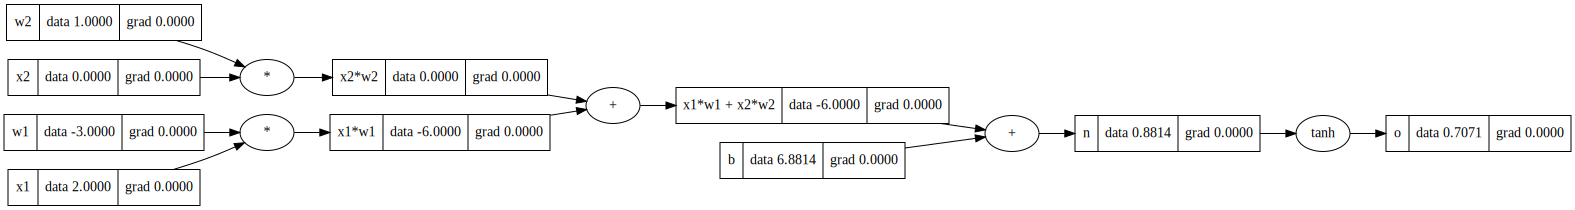

In [10]:
# inputs x1,x2 -> Raw inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2 -> Synaptic strength that connects the inputs
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1
x1w1.label = 'x1*w1'

x2w2 = x2*w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'

o = n.tanh()
o.label = 'o'

draw_dot(o)

In [8]:
o.grad = 1
o._backward()

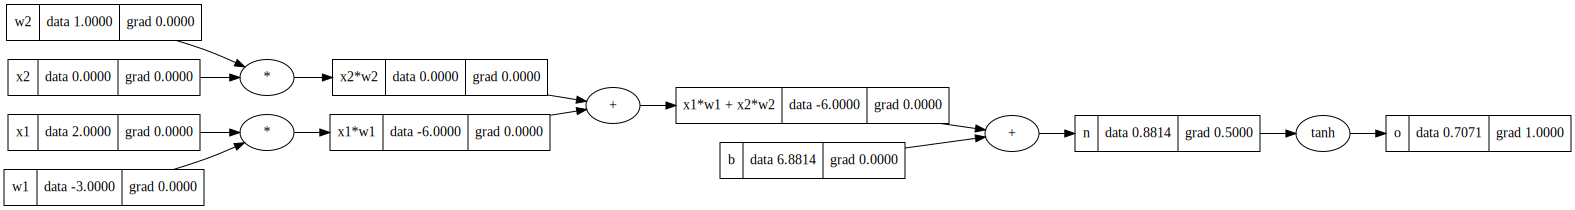

In [9]:
draw_dot(o)

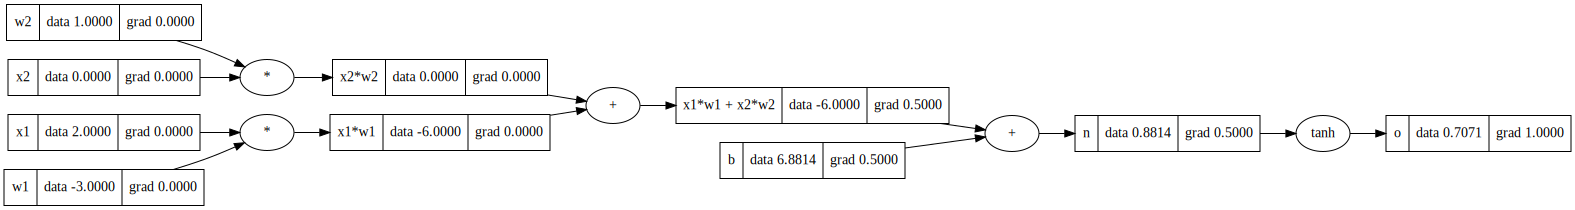

In [10]:
n._backward()

draw_dot(o)

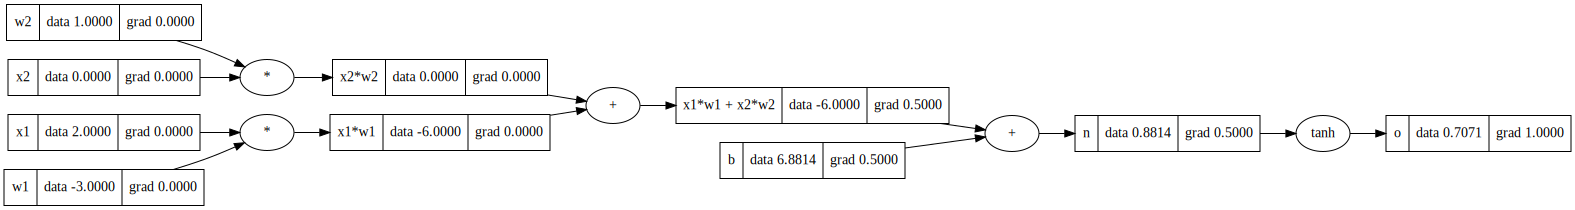

In [11]:
b._backward() # Should show no chages since b is a leaf node

draw_dot(o)

In [12]:
x1w1x2w2._backward()
x2w2._backward()
x1w1._backward()

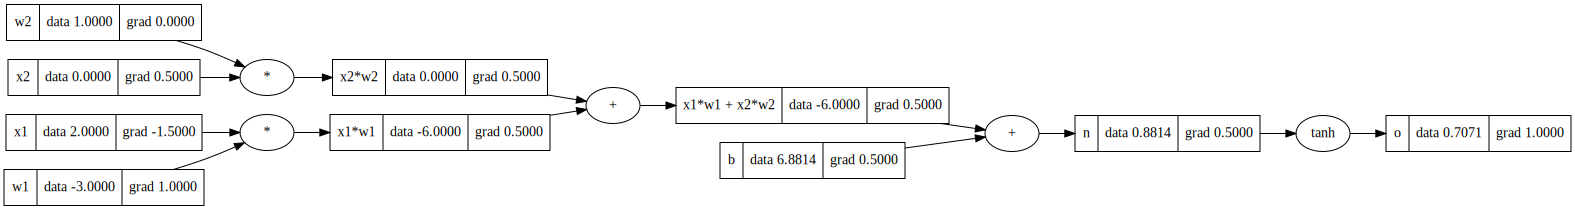

In [13]:
draw_dot(o)